In [1]:
import turicreate as tc

In [2]:
img_folder = "/home/cetc28/lixbi/test_data/demo-python-image-classification/image"

In [3]:
data = tc.image_analysis.load_images(img_folder, with_path=True)

In [9]:
data.head()

path,image,label
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 165 Width: 310,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 1377 Width: 736,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 382 Width: 215,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 248 Width: 203,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 637 Width: 430,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 275 Width: 183,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 230 Width: 210,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 275 Width: 183,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 271 Width: 186,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 425 Width: 640,doraemon


In [5]:
data['label'] = data['path'].apply(lambda path: 'doraemon' if 'doraemon' in path else 'walle')

In [13]:
data.tail()

path,image,label
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 450 Width: 800,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 359 Width: 700,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 180 Width: 320,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 320 Width: 1024,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 167 Width: 301,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 880 Width: 1580,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 240 Width: 210,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 273 Width: 184,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 1080 Width: 1920,walle
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 1600 Width: 2560,walle


In [11]:
data.save('doraemon-walle.sframe')

,path,image,label
0,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-071.jpg,,walle
1,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-072.jpeg,,walle
2,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-073.jpg,,walle
3,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-074.jpeg,,walle
4,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-075.jpeg,,walle
5,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-076.jpeg,,walle
6,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-077.jpeg,,walle
7,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-078.jpeg,,walle
8,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-079.jpg,,walle
9,/home/cetc28/lixbi/test_data/demo-python-image-classification/image/walle/image-080.jpg,,walle

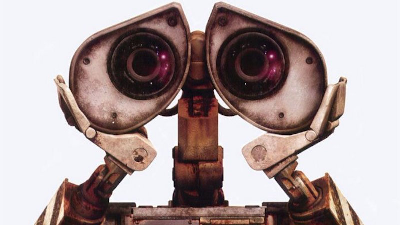
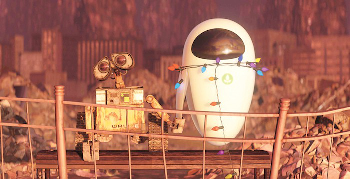
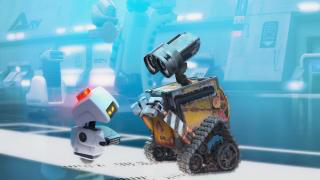
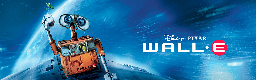
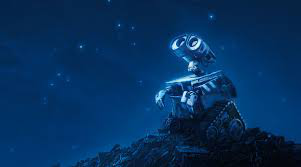
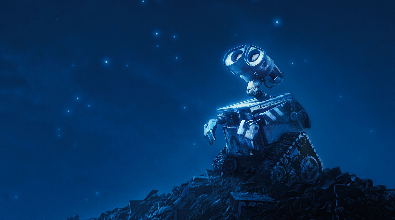
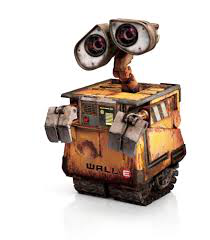
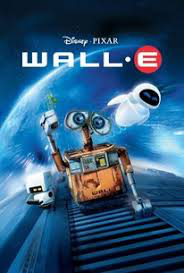
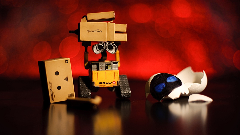
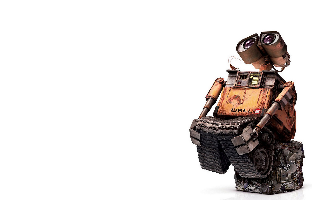

In [14]:
data.tail().explore()

In [15]:
train_data, test_data = data.random_split(0.8, seed=2)

In [19]:
test_data.head(2)

path,image,label
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 382 Width: 215,doraemon
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 425 Width: 640,doraemon


In [18]:
model = tc.image_classifier.create(train_data, target='label')

Download completed: /var/tmp/model_cache/resnet-50-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed  64/168
Completed 128/168
Completed 168/168
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 159

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 1.067339     | 0.899371          | 1.000000            |

| 1         | 5        | 0.500000  | 1.132146     | 0.981132          | 1.000000            |

| 2         | 6        | 0.625000  | 1.171193     | 0.981132          | 1.000000            |

| 3         | 9        | 0.312500  | 1.248417     | 0.981132          | 0.888889            |

| 4         | 15       | 0.948818  | 1.381449     | 1.000000          | 1.000000            |

| 9         | 25       | 0.948818  | 1.661097     | 1.000000          | 1.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [25]:
predictions = model.predict(test_data[["path", "image"]])

ERROR! Session/line number was not unique in database. History logging moved to new session 44


In [26]:
predictions

dtype: str
Rows: 31
['doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle']

In [29]:
test_data["pre_label"] = predictions
test_data[test_data["pre_label"] != test_data["label"]]

path,image,label,pre_label


In [23]:
metrics = model.evaluate(test_data)
print(metrics['accuracy'])

Performing feature extraction on resized images...
Completed 31/31
1.0


In [43]:
# 使用turicreate  进行图形识别

def load_data(image_src):
    """加载测试数据"""
    data = tc.image_analysis.load_images(image_src, with_path=True)
    return data

def split_train_test_data(data):
    """分割 训练数据和测试数据"""
    data['label'] = data['path'].apply(lambda path: 'doraemon' if 'doraemon' in path else 'walle')
    
    # 也可以查看图片详情
    # data.explore()
    train_data, test_data = data.random_split(0.8, seed=2)
    return train_data, test_data

def generate_model(train_data):
    """生成模型"""
    model = tc.image_classifier.create(train_data, target='label')
    return model

def predict_data(model, test_data):
    """预测数据， 生成预测结果"""
    predictions = model.predict(test_data)
    # 返回预测结果
    return predictions

def check_predict_data(test_data, predict_result):
    """测试数据和预测结果对比"""
    test_data["pre_label"] = predictions
    return test_data[test_data["pre_label"] != test_data["label"]]
#     return test_data


    
img_folder = "/home/cetc28/lixbi/test_data/demo-python-image-classification/image"
print("加载数据")
data = load_data(img_folder)
print("把数据分割成训练和测试数据两部分")
train_data, test_data = split_train_test_data(data)
print("训练模型")
model = generate_model(train_data)
# predict_result = predict_data(model, test_data)
# print("*"*10+"预测结果",  predict_result)



加载数据
把数据分割成训练和测试数据两部分
训练模型
Performing feature extraction on resized images...
Completed  64/174
Completed 128/174
Completed 174/174
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 165

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 2049

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.059602     | 0.969697          | 0.888889            |

| 1         | 5        | 0.500000  | 0.114447     | 0.975758          | 0.888889            |

| 2         | 6        | 0.625000  | 0.153376     | 0.969697          | 0.888889            |

| 3         | 7        | 0.781250  | 0.192031     | 0.981818          | 0.888889            |

| 4         | 9        | 0.781250  | 0.247177     | 0.993939          | 0.888889            |

| 9         | 20       | 1.234881  | 0.549857     | 1.000000          | 0.888889            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [45]:
predict_data(model, test_data)

dtype: str
Rows: 31
['doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'doraemon', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle', 'walle']

In [33]:
check_predict_data(test_data, predict_result)

path,image,label,pre_label


In [41]:
# 测试未知数据
img_src = "/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test"
new_data = load_data(img_src)
new_data

path,image
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 1080 Width: 1442
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 782 Width: 440
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 300 Width: 504
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 320 Width: 359
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 500 Width: 500
/home/cetc28/lixbi/test_data/demo-python-image ...,Height: 232 Width: 268


In [46]:
predict_data(model, new_data)

dtype: str
Rows: 6
['walle', 'walle', 'doraemon', 'doraemon', 'doraemon', 'walle']

In [52]:
new_data["path"]

dtype: str
Rows: 6
['/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/aa.jpg', '/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/ab.jpg', '/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/ad.jpg', '/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/ae.jpg', '/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/ag.jpg', '/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/dd.jpg']

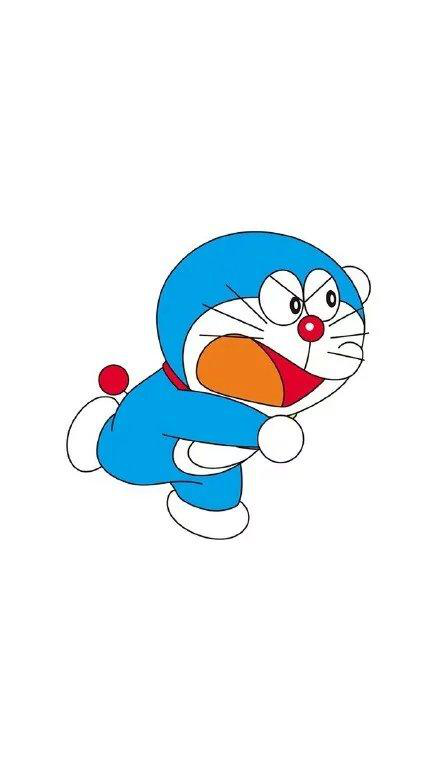

In [53]:
img = tc.Image("/home/cetc28/lixbi/test_data/demo-python-image-classification/image/test/ab.jpg")
img.show()